Green is Average Case
Blue is Best Case
Red is Worst Case


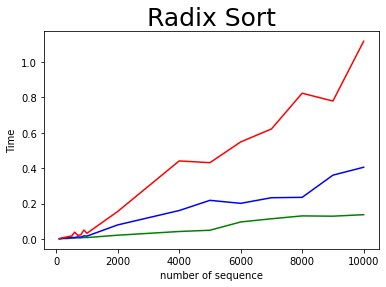

In [1]:

import random
import time
import matplotlib.pyplot as plt
# Implements the Array ADT using array capabilities of the ctypes module.
import ctypes

class ListNode( object ):
    def __init__(self, item):
        self._item = item
        self._next = None
        
class LQueue:
    #Constructs an empty queue.
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0

    def isEmpty( self ):
        return self._size == 0

    def __len__ ( self ):
        return self._size

    def enqueue( self, item ):
        #assert not 
        newNode = ListNode(item)
        if self._size == 0:
            self._head = newNode

        else:
            self._tail._next = newNode

        self._tail = newNode
            
        self._size += 1

    def dequeue( self ):
        assert not self.isEmpty(), "Cannot dequeue to an empty queue" 
        item = self._head._item
        self._head = self._head._next
        self._size -= 1
        return item

    def __repr__( self ):
        curNode = self._head
        s = ""
        while curNode is not None:
            s = s + str(curNode._item)
            if curNode._next != None:
                s = s + "<--"
            curNode = curNode._next
        return s

    def isContain( self, target ):
        curNode = self._head
        while curNode is not None and curNode._item != target :
            curNode = curNode._next
        return curNode is not None


class Array:
    # Creates an array with size elements.
    def __init__(self, size):
        assert size > 0, "Array size must be > 0"
        self._size = size
        # Create the array structure using the ctypes module.
        PyArrayType = ctypes.py_object * size
        self._elements = PyArrayType()
        # Initialize each element.
        self.clear(None)

    # Returns the size of the array.
    def __len__(self):
        return self._size

    # Gets the contents of the index element.
    def __getitem__(self, index):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        return self._elements[index]

    # Puts the value in the array element at index position.
    def __setitem__(self, index, value):
        assert index >= 0 and index < len(self), "Array subscript out of range"
        self._elements[index] = value

    def __add__(self, rhsArray):
        assert self._size == rhsArray._size, "Array can't be added"
        newArray = Array(self._size)
        for i in range(self._size):
            newArray[i] = self[i] + rhsArray[i]
        return newArray

    # Clears the array by setting each element to the given value.
    def clear(self, value):
        for i in range(len(self)):
            self._elements[i] = value

    # Returns the array's iterator for traversing the elements.
    def __iter__(self):
        return _ArrayIterator(self._elements)

    # Returns the string reputation of an object
    def __repr__(self):
        s = '[ '
        for x in self._elements:
            s = s + str(x) + ' ,'
        s = s[:-2] + ' ]'
        return s

    # An iterator for the Array ADT.


class _ArrayIterator:
    def __init__(self, theArray):
        self._arrayRef = theArray
        self._curNdx = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self._curNdx < len(self._arrayRef):
            entry = self._arrayRef[self._curNdx]
            self._curNdx += 1
            return entry
        else:
            raise StopIteration


# Implementation of the Array2D ADT using an array of arrays.
class Array2D:
    # Creates a 2-D array of size numRows x numCols.
    def __init__(self, numRows, numCols):
        # Create a 1-D array to store an array reference for each row.
        self._theRows = Array(numRows)
        # Create the 1-D arrays for each row of the 2-D array.
        for i in range(numRows):
            self._theRows[i] = Array(numCols)

    # Returns the number of rows in the 2-D array.
    def numRows(self):
        return len(self._theRows)

    # Returns the number of columns in the 2-D array.
    def numCols(self):
        return len(self._theRows[0])

    # Clears the array by setting every element to the given value.
    def clear(self, value):
        for row in range(self.numRows()):
            # row_.clear( value )
            self._theRows[row].clear(value)

    # Gets the contents of the element at position [i, j]
    def __getitem__(self, ndxTuple):
        assert len(ndxTuple) == 2, "Invalid number of array subscripts."
        row = ndxTuple[0]
        col = ndxTuple[1]
        assert row >= 0 and row < self.numRows() \
               and col >= 0 and col < self.numCols(), \
            "Array subscript out of range."
        the1dArray = self._theRows[row]
        return the1dArray[col]

    # Sets the contents of the element at position [i,j] to value.
    def __setitem__(self, ndxTuple, value):
        assert len(ndxTuple) == 2, "Invalid number of array subscripts."
        row = ndxTuple[0]
        col = ndxTuple[1]
        assert row >= 0 and row < self.numRows() \
               and col >= 0 and col < self.numCols(), \
            "Array subscript out of range."
        the1dArray = self._theRows[row]
        the1dArray[col] = value

    # Returns the string reputation of an object
    def __repr__(self):
        s = '[ '
        for r in range(self.numRows()):
            for c in self._theRows[r]:
                s = s + str(c) + ' '
            s = s[:-1] + '\n'
        s = s[:-1] + ' ]'
        return s


class Matrix(Array2D):
    def __init__(self, numRows, numCols):
        super().__init__(numRows, numCols)

    # Scales the matrix by the given scalar.
    def scaleBy(self, scalar):
        for r in range(self.numRows()):
            for c in range(self.numCols()):
                self[r, c] *= scalar

    # Creates and returns a new matrix that is the transpose of this matrix.
    def transpose(self):
        newMatrix = Matrix(self.numRows(), self.numCols())
        for r in range(self.numRows()):
            for c in range(self.numCols()):
                newMatrix[r, c] = self[c, r]
        return newMatrix

    # Creates and returns a new matrix that results from matrix addition.    
    def __add__(self, rhsMatrix):
        assert rhsMatrix.numRows() == self.numRows() and \
               rhsMatrix.numCols() == self.numCols(), \
            "Matrix sizes not compatible for the add operation."
        # Create the new matrix.
        newMatrix = Matrix(self.numRows(), self.numCols())
        # Add the corresponding elements in the two matrices.
        for r in range(self.numRows()):
            for c in range(self.numCols()):
                newMatrix[r, c] = self[r, c] + rhsMatrix[r, c]
        return newMatrix

    # Creates and returns a new matrix that results from matrix subtraction.
    def __sub__(self, rhsMatrix):
        assert rhsMatrix.numRows() == self.numRows() and \
               rhsMatrix.numCols() == self.numCols(), \
            "Matrix sizes not compatible for the add operation."
        # Create the new matrix.
        newMatrix = Matrix(self.numRows(), self.numCols())
        # Add the corresponding elements in the two matrices.
        for r in range(self.numRows()):
            for c in range(self.numCols()):
                newMatrix[r, c] = self[r, c] - rhsMatrix[r, c]
        return newMatrix

    # Creates and returns a new matrix resulting from matrix multiplication.
    def __mul__(self, rhsMatrix):
        assert self.numCols() == rhsMatrix.numRows(), \
            "Matrix size not compatible for the multiple operation"
        newMatrix = Matrix(self.numRows(), rhsMatrix.numCols())
        for r in range(newMatrix.numRows()):
            for c in range(self.numCols()):
                for i in range(self.numCols()):
                    newMatrix[r, c] += (self[r, i] * rhsMatrix[i, c])
        return NewMarix
    
def radixSort( seq, numDigits ): 
    # Create an array of queues to represent the bins. 
    binArray = Array(10) 
    for k in range( 10 ): 
        binArray[k] = LQueue() 
    # The value of the current column. 
    column = 1
    # Iterate over the number of digits in the largest value. 
    for d in range( numDigits ): 
    # Distribute the keys across the 10 bins. 
        for key in seq : 
            digit = (key // column) % 10 
            binArray[digit].enqueue( key )
            
    # Gather the keys from the bins and place them back in intList. 
    i = 0
    for bin in range(len(binArray)) :
        while not binArray[bin].isEmpty() :
            if i < len(seq):
                seq[i] = binArray[bin].dequeue()
                i += 1
            else :
                seq.append(binArray[bin].dequeue())
        # Advance to the next column value.
        column *= 10
        
    return seq 

def findigit(num):
    if num % 10 < num:
        if num % 100 < num:
            if num % 1000 < num:
                if num % 10000 < num:
                    return 5
                else :
                    return 4
            else:
                return 3

        else:
            return 2
    else:
        return 1

lis = [100, 200,400,500,600,700,800,900,1000,2000,4000,5000,6000,7000,8000,9000,10000]

Average = []
Best = []
Worst = []

for j in lis :
    seq = [] 
    for i in range(0 , j ):
        seq.append(random.randint( 1, j ))
        
    
    MaxNum = max(seq)

    digits = findigit(MaxNum)

    start_A = time.time( )
    
    A = radixSort(seq, digits)
    end_A = time.time( )
    elapsed_A = end_A - start_A
    
    Average.append(elapsed_A)
    
    start_B = time.time( )
    B = radixSort(A, digits)
    end_B = time.time( )
    elapsed_B = end_B - start_B
    
    Best.append(elapsed_B)

    B_reversed = reversed(B)
    start_W = time.time( )
    W = radixSort(list(B_reversed), digits)
    end_W = time.time( )
    elapsed_W = end_W - start_W
    
    Worst.append(elapsed_W)
    
print("Green is Average Case")
print("Blue is Best Case")
print("Red is Worst Case")

plt.title('Radix Sort', fontsize = 25)
plt.xlabel("number of sequence")
plt.ylabel("Time")
plt.plot(lis, Average,'g',lis, Best,'b',lis, Worst,'r')

plt.show()